<a href="https://colab.research.google.com/github/freehtet/Machine-Learning/blob/main/m507a_methods_of_prediction_ws0924__wai_yann_htet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

As data scientist, I have been assigned to improve the customer experience as my company, streaming such as Netflix, want to keep customers happy by finding/recommending movies which they might enjoy form the large number of movies. Due to recent reports, it has been found out that customers are spending too much time on finding movies which would meet their taste of enjoyment. As this is important, because making customers enjoy on platform will create the loyal customers and increase the benefit of the company. Nowadays, there are multiple streaming companies which customers can easily churn if the company does not make the plan for user improvement such as personalization for user experience. So, as consequence, if company can not offer the customer's taste movies, eventually, users will move out from the platforms by reducing daily active users (DAU) and monthly active users (MAU). Finally, company lose the revenue.

Data has been collected from the Kaggle. ( https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data).

As per the task, the machine learning model will be built based on requirement for movie recommendation based on user preference and history rating, then predict the new movie based on history. This model will be built by using tensorflow neural network model. The input of the models are  userID and movieID. The output of model will be the predicted customer rating on movie. MAE (mean absolute error) and MSE (mean squared error) will be used as metric for the evaluation of the model.

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

#Loading Dataset

Source: https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data

In [ ]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

#Checking information about data

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
display(ratings.shape)
display(movies.shape)

(25000095, 4)

(62423, 3)

In [ ]:
display(ratings.info())
display(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


None

In [ ]:
display(ratings.isnull().sum().sum())
display(movies.isnull().sum().sum())

0

0

Note: Dataset is clean to proceed

#Data exploration

In [ ]:
ratings['rating'].value_counts().sort_index()

,count
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


Checking data distribution of the rating

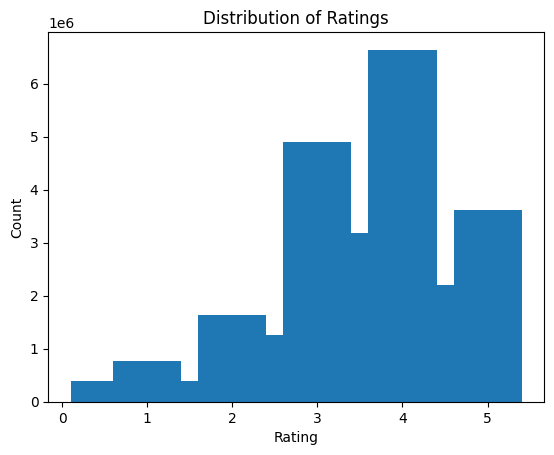

In [ ]:
plt.bar(ratings['rating'].value_counts().sort_index().index, ratings['rating'].value_counts().sort_index().values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

Merging the table to one to build meachine learning model which required consolidated dataset.

In [ ]:
movie_ratings = pd.merge(ratings, movies, on='movieId')
movie_ratings.drop('timestamp', axis=1, inplace=True)
movie_ratings.head()

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,Underground (1995),Comedy|Drama|War
4,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance


Checking the Top 10 most

In [ ]:
display('Top 10 most rated movies')
viewers = movie_ratings.groupby(['title']).agg({"rating":"count"})['rating'].sort_values(ascending=False).to_frame()
viewers.rename(columns={'rating':'viewers'}, inplace=True)
viewers.head(10)

'Top 10 most rated movies'

,viewers
title,
Forrest Gump (1994),81491
"Shawshank Redemption, The (1994)",81482
Pulp Fiction (1994),79672
"Silence of the Lambs, The (1991)",74127
"Matrix, The (1999)",72674
Star Wars: Episode IV - A New Hope (1977),68717
Jurassic Park (1993),64144
Schindler's List (1993),60411
Braveheart (1995),59184


Checking most rated movies

In [ ]:
avg_rating = movie_ratings.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False).to_frame()
avg_rating.rename(columns={'rating':'avg_rating'}, inplace=True)
avg_rating.head(10)

,avg_rating
title,
Full of Grace (2015),5.0
Geordie (1955),5.0
Garfield In Paradise (1986),5.0
Lost Woods (2012),5.0
Garfield in the Rough (1984),5.0
Lost Time (2014),5.0
Who Killed Chea Vichea? (2010),5.0
Lost Rivers (2013),5.0
Who Killed Johnny (2013),5.0


Table of most viewer movie and its rating

In [ ]:
pd.merge(avg_rating, viewers, on='title')[pd.merge(avg_rating, viewers, on='title')['viewers'] > 10000].head(10)

,avg_rating,viewers
title,,
"Shawshank Redemption, The (1994)",4.413576,81482
"Godfather, The (1972)",4.324336,52498
"Usual Suspects, The (1995)",4.284353,55366
"Godfather: Part II, The (1974)",4.261759,34188
Seven Samurai (Shichinin no samurai) (1954),4.254769,13367
Schindler's List (1993),4.247579,60411
12 Angry Men (1957),4.243014,16569
Rear Window (1954),4.237948,20162
Fight Club (1999),4.228311,58773


#Data Pre-processing

Normalization of the movie rating from range of 0 to 1.

In [ ]:
movie_ratings['rating'] = movie_ratings['rating']/ 5

Spliting the data set with training, validation and test set.

Due to the performance and time, dataset has been sampled 1000 rows.

In [ ]:
train, data = train_test_split(movie_ratings.sample(1000, random_state=42), test_size=0.2, random_state=42)

In [ ]:
val, test = train_test_split(data, test_size=0.5, random_state=42)

In [ ]:
train.head()

,userId,movieId,rating,title,genres
4320196,28436,1275,1.0,Highlander (1986),Action|Adventure|Fantasy
14853534,96236,4345,0.5,"Anniversary Party, The (2001)",Drama
13633389,88261,88235,0.7,"Guard, The (2011)",Comedy|Crime
7469673,48526,1073,0.6,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical
24741734,160825,2268,0.6,"Few Good Men, A (1992)",Crime|Drama|Thriller


#Building the model ( Best Model)

1.Finding the max number of userID and movieID.
2.Setting the UserID and movieID to start from 0.

In [ ]:
max_user_id = train['userId'].max()
max_movie_id = train['movieId'].max()
train['userId'] = train['userId'] -1
train['movieId'] = train['movieId'] -1

Creating the Input layer with the shape

In [ ]:
user = layers.Input(shape=(1,))
movie = layers.Input(shape=(1,))

Creating the embedding layer with 50-dimention vectors which will help model to understand the relationship between user and movie.

In [ ]:
user_embedding = layers.Embedding(input_dim=int(max_user_id + 1), output_dim=50)(user)
movie_embedding = layers.Embedding(input_dim=int(max_movie_id + 1), output_dim=50)(movie)

flatten the enbedding vector from 2D to 1D.

In [ ]:
user_vector = layers.Flatten()(user_embedding)
movie_vector = layers.Flatten()(movie_embedding)

combine 2 vector layer into one layer

In [ ]:
concat = layers.Concatenate()([user_vector, movie_vector])

Since this regression task 'linear' output layer has been implemented with 2 Dense layers and Batch Nomalization.

In [ ]:
layer1 = layers.Dense(128, activation='relu')(concat)
layer2 = layers.Dense(64, activation='relu')(layer1)
layer2 = layers.BatchNormalization()(layer2)
outcome = layers.Dense(1, activation='linear')(layer2)

creating the model by receiving user and movie through the setup with embedded layers and dense layers. The output will be the outcome ( predicted rating based on user and movie).

In [ ]:
model = models.Model(inputs=[user, movie], outputs=outcome)

In [ ]:
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_40            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_41            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_40 (Embedding)  │ (None, 1, 50)          │      8,114,200 │ input_layer_40[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_41 (Embedding)  │ (None, 1, 50)          │      9,719,100 │ input_layer_41[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_40 (Flatten)      │ (None, 50)             │              0 │ embedding_40[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_41 (Flatten)      │ (None, 50)             │              0 │ embedding_41[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_20            │ (None, 100)            │              0 │ flatten_40[0][0],      │
│ (Concatenate)             │                        │                │ flatten_41[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_78 (Dense)          │ (None, 128)            │         12,928 │ concatenate_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_79 (Dense)          │ (None, 64)             │          8,256 │ dense_78[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 64)             │            256 │ dense_79[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_80 (Dense)          │ (None, 1)              │             65 │ batch_normalization_1… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,854,805 (68.11 MB)

 Trainable params: 17,854,677 (68.11 MB)

 Non-trainable params: 128 (512.00 B)

Using the adam optimizer with learning rate 0.002. This will optimized the model's weight during the training.

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002)

Creating the early stopping in order to monitor the validation loss.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Compling the model with adam optimizer with metrics mean absolute error.

In [ ]:
model.compile(
    optimizer= adam_optimizer,
    loss= ['mse'],
    metrics=['mean_absolute_error']
)

#Training model

Training the model with epochs = 10, batch_size =64, validation_split =0.1 and early stopping with callback.

In [ ]:
model_training_history = model.fit(
    x=[train['userId'], train['movieId']],
    y=train['rating'],
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - loss: 0.5724 - mean_absolute_error: 0.6533 - val_loss: 0.2622 - val_mean_absolute_error: 0.4651
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - loss: 0.2197 - mean_absolute_error: 0.4102 - val_loss: 0.1029 - val_mean_absolute_error: 0.2828
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - loss: 0.0473 - mean_absolute_error: 0.1820 - val_loss: 0.0583 - val_mean_absolute_error: 0.1943
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - loss: 0.0100 - mean_absolute_error: 0.0759 - val_loss: 0.0627 - val_mean_absolute_error: 0.1917
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - loss: 0.0092 - mean_absolute_error: 0.0769 - val_loss: 0.0585 - val_mean_absolute_error: 0.1917
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - loss: 0.0039 - mean_absolute_error: 0.0451 - val_loss: 0.0582 - val_mean_absolute_error: 0.1939
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 322ms/step - loss: 0.0041 - mean_absolute_error: 0.0430 - v

In [ ]:
pd.DataFrame(model_training_history.history)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.495261,0.610742,0.262226,0.465067
1,0.180025,0.364356,0.102868,0.282816
2,0.036541,0.155676,0.058331,0.194318
3,0.012499,0.083646,0.062679,0.191743
4,0.009094,0.074598,0.058486,0.191699
5,0.005023,0.051605,0.058215,0.193884
6,0.004062,0.043847,0.058214,0.192968
7,0.002374,0.032928,0.058208,0.191525
8,0.002410,0.034157,0.058257,0.191484
9,0.002612,0.036891,0.058160,0.192351


Model evaluation

In [ ]:
rmse, mae = model.evaluate(x=[val['userId'],val['movieId']],y=val['rating'],verbose=0)

In [ ]:
rmse, mae

(0.05570171773433685, 0.18783096969127655)

#Experimental report

In [ ]:
table = PrettyTable()

In [ ]:
table.field_names = ["Model", "RMSE", "MAE", "Expirement"]
table.add_row(["Model 1", 0.1063, 0.2909, 'Without Early Stopping with batch_size=256'])
table.add_row(["Model 2", 0.1388, 0.3409, 'With Batch Normalization and Drop Out layers for all Dense layers'])
table.add_row(["Model 3", 0.0627, 0.2061, 'Added the call back'])
table.add_row(["Model 4", 0.0677, 0.2150, 'No Learning rate'])
table.add_row(["Model 5", 0.0555, 0.1862, 'Learning rate with 0.001'])
table.add_row(["Model 6", 0.0606, 0.1989, 'Add one more Dense Layer (256, Relu) above layer1'])
table.add_row(["Model 7", 0.0578, 0.1957, 'add a dropout ( 0.2) after layer 2'])
table.add_row(["Model 8", 0.0587, 0.1963, 'add drop out 2 dense lay layers ( 1 and 2)'])
table.add_row(["Model 9", 0.2393, 0.4514, 'add one batch normalization after layer1 and drop out layer after layer 2'])
table.add_row(["Model 10", 0.0552, 0.1856, 'Change Dense layer 1 into 500'])

In [ ]:
display("Results of the expirement:")
print(table)

'Results of the expirement:'

+----------+--------+--------+---------------------------------------------------------------------------+
|  Model   |  RMSE  |  MAE   |                                 Expirement                                |
+----------+--------+--------+---------------------------------------------------------------------------+
| Model 1  | 0.1063 | 0.2909 |                 Without Early Stopping with batch_size=256                |
| Model 2  | 0.1388 | 0.3409 |     With Batch Normalization and Drop Out layers for all Dense layers     |
| Model 3  | 0.0627 | 0.2061 |                            Added the call back                            |
| Model 4  | 0.0677 | 0.215  |                              No Learning rate                             |
| Model 5  | 0.0555 | 0.1862 |                          Learning rate with 0.001                         |
| Model 6  | 0.0606 | 0.1989 |             Add one more Dense Layer (256, Relu) above layer1             |
| Model 7  | 0.0578 | 0.1957 |       

#Final performance assessment with Test set with Best model
(unseem Data)

In [ ]:
rmse, mae = model.evaluate(x=[test['userId'],test['movieId']],y=test['rating'],verbose=0)

In [ ]:
rmse, mae

(0.03995173051953316, 0.15715257823467255)

#Final discussion

During the expirementation, following facts encounter:
1. Adding dropout and batch normalization layers in all layers make the performance worse.
2. Changing the batch size to into larger number have big impact on the model performance.
3. Adding one batch normalization after layer1 and drop out layer after layer 2, make the performance a lot worse in performance.
4. Adding only one batch normalization after layer2 make the model optimized the performance.
5. The other tweets doesn't have sigfincant improvement in the model.

Overall, adding unnecessary optimizer and others extra layer by expecting to recevie better performance is not helping to get the optimal best model. As of next step, this model can be used to identify by generating predicted movie review rating based on input movie and user.